In [28]:
import pandas as pd
import pickle

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import sys
sys.path.insert(0, './../../preprocessing')

In [31]:
import session as ss

In [32]:
def load_data():
    t = pickle.load( open( "./../../data_set.p", "rb" ) )
    t = t[t['action_cleaned'] != 'click_on_other']
    t = ss.define_session(t)
    return t

In [33]:
df = load_data()

3465876


In [34]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [35]:
sessions = []
for uuid, row in df.groupby('UUID'):
    session = []
    for a in row['action_cleaned']:
        session.append(a)
    sessions.append(session)

total_examples = len(sessions)
print('num sessions', total_examples)
print('total num events',len(df)) 

num sessions 199991
total num events 3465876


In [36]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(sessions)

# excluding actions occuring in less than 10 sessions and in more than 10% of total amount of sessions
#dictionary.filter_extremes(no_below=10, no_above=0.1)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(213 unique tokens: ['click_new_subscription_from_scratch', 'click_next_in_subscr_order', 'click_on_activate', 'click_on_company', 'click_on_confirm']...)


In [37]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in sessions]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

199991
[(23, 1), (25, 1), (30, 1), (31, 1), (53, 1), (63, 1)]


In [72]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(corpus=doc_term_matrix, num_topics=6, id2word=dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

KeyboardInterrupt: 

In [13]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(3, '0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail"'), (12, '0.543*"click_on_name" + 0.216*"click_on_subscription" + 0.094*"load_homepage" + 0.040*"click_on_menu_accounts"')]


In [14]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.398*"click_on_save" + 0.250*"click_on_edit_field" + 0.103*"click_on_number_details" + 0.073*"click_on_MBN_sub" + 0.043*"click_on_new_settings" + 0.033*"click_on_user_type" + 0.031*"click_on_find_person" + 0.028*"load_other_page" + 0.022*"click_on_cancel" + 0.014*"click_on_reference"
1
0.306*"open_invoice_account" + 0.129*"click_on_number_details" + 0.123*"click_on_company" + 0.085*"click_on_menu_subscriptions" + 0.054*"click_on_confirm" + 0.043*"click_on_get_report" + 0.041*"load_homepage" + 0.040*"click_on_new_report" + 0.033*"scroll_on_reports_page" + 0.031*"load_other_page"
2
0.260*"click_on_change_account" + 0.246*"click_on_arrow" + 0.085*"click_on_activate" + 0.081*"click_on_number_details" + 0.075*"activate_new" + 0.052*"click_on_sim_card" + 0.040*"load_homepage" + 0.029*"click_on_add" + 0.026*"loading subscriptions" + 0.025*"click_on_navicon"
3
0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail" + 0.080*"load_h

In [53]:
ldamodel.save('6_topics/topic.model')

In [41]:
from gensim.models import LdaModel
loading = LdaModel.load('10_topics/topic.model')

In [23]:
print(loading.print_topics(num_topics=2, num_words=4))

[(2, '0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference"'), (1, '0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage"')]


In [38]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [60]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('models/12_topics/topic.model')

In [61]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.190751 -0.041070       1        1  20.432379
9      0.116657  0.150440       2        1  15.901891
6     -0.036928  0.245640       3        1  15.574682
8     -0.107006  0.246749       4        1  15.123685
5      0.195358  0.014617       5        1   7.209810
3     -0.255045 -0.042425       6        1   6.381718
10    -0.078625  0.125073       7        1   4.885673
11    -0.329644 -0.171957       8        1   4.005800
4      0.044991 -0.106916       9        1   3.825930
0      0.199375 -0.065694      10        1   3.670424
1      0.188698 -0.196787      11        1   1.739988
2     -0.128583 -0.157669      12        1   1.248013, topic_info=     Category           Freq                                    Term  \
term                                                                   
37    Default  158184.000000                           click_log_out   
21    Default  247858.000000                      scroll_on_homepage   
28    Default  163139.000000                          click_on_arrow   
7     Default  145508.000000                 click_on_number_details   
1     Default  211969.000000              click_next_in_subscr_order   
6     Default   58554.000000               click_on_new_subscription   
5     Default   43790.000000                    click_on_find_person   
67    Default   50833.000000                      click_on_reference   
17    Default   94887.000000                           load_homepage   
15    Default  259744.000000             interact_with_pop_up_window   
13    Default   42390.000000                 click_on_sub_voice_data   
51    Default   72182.000000                  click_on_notifications   
25    Default   71919.000000                           click_on_name   
72    Default   81853.000000     click_on_send_order_status_to_email   
16    Default  251571.000000                          interrupt_task   
43    Default   24873.000000  order_overview_check_orders_in_process   
31    Default   53002.000000                  empty_subselect_ignore   
40    Default   86730.000000                     click_on_agreements   
60    Default   26495.000000                 click_on_administrators   
4     Default   74021.000000                        click_on_confirm   
86    Default   25552.000000                    click_on_mbn_details   
12    Default   59000.000000                           click_on_send   
29    Default   40815.000000                   click_on_new_settings   
48    Default   28698.000000                       click_on_external   
9     Default   93282.000000                    click_on_see_history   
44    Default   26503.000000                          see_agreements   
14    Default   34662.000000                     go_back_to_homepage   
32    Default   33470.000000                      GDPR_related_click   
76    Default   19548.000000                     click_on_new_report   
22    Default   14472.000000                              start_chat   
...       ...            ...                                     ...   
145   Topic12      23.644365               click_on_give_read_access   
141   Topic12      15.206977                       select_no_binding   
5     Topic12   39804.843750                    click_on_find_person   
189   Topic12       5.673506                          click_on_pause   
124   Topic12     167.510223                click_on_send_entry_code   
157   Topic12     185.830475                  click_on_error_details   
56    Topic12     279.904968                        click_on_overall   
209   Topic12       1.781138        order_overview_check_locked_subs   
154   Topic12      22.078569                           click_on_paid   
162   Topic12      32.412022                           click_on_star   
122   Topic12      22.926273         click_on_choose_in_subscr_order   
71    Topic12      17.702024     

In [33]:
pyLDAvis.save_html(data,'vis.html')

In [91]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('models/10_topics/topic.model')

CPU times: user 2.59 ms, sys: 0 ns, total: 2.59 ms
Wall time: 1.94 ms


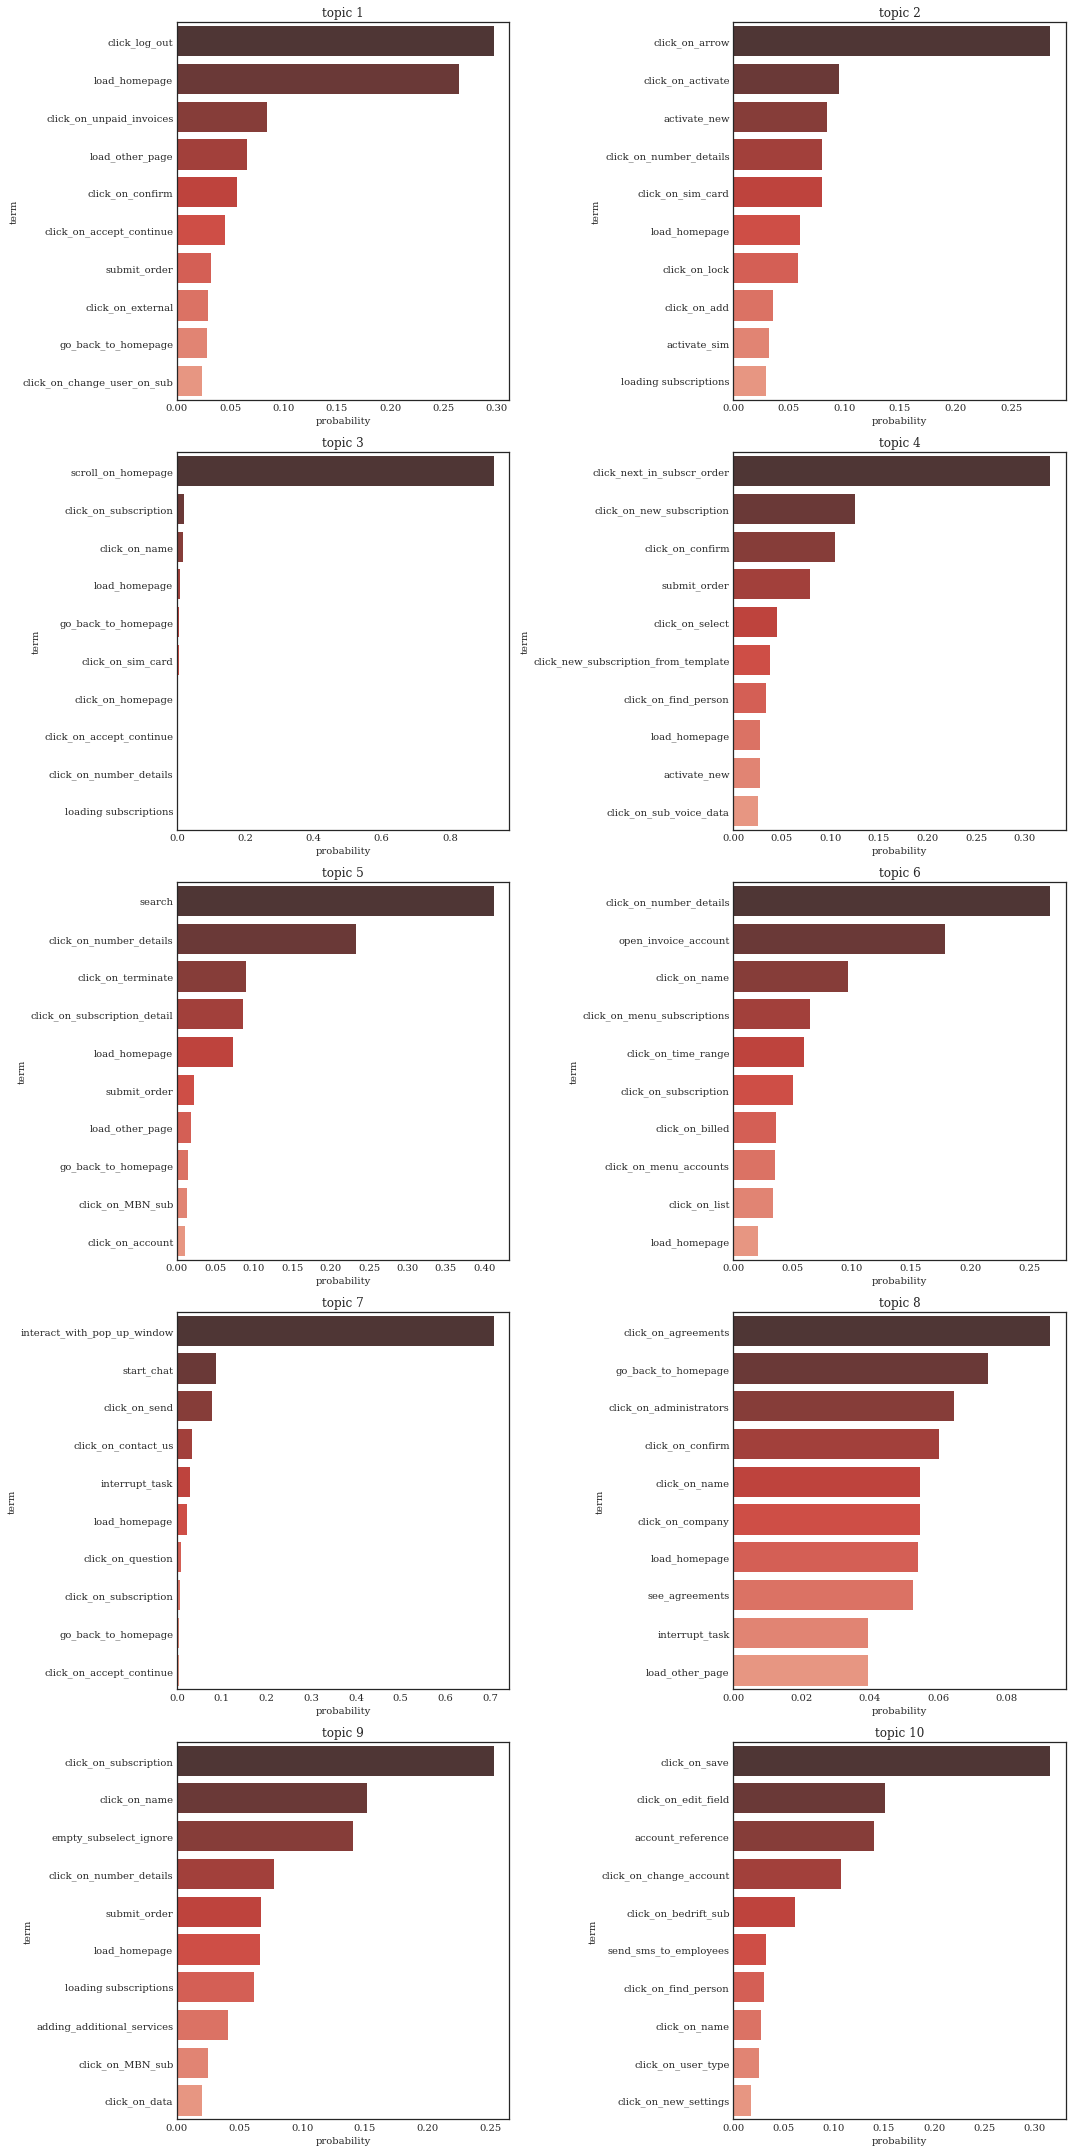

In [87]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')

fiz.tight_layout()
plt.show()

# save as PDF
fiz.savefig("models/10_topics.pdf", bbox_inches='tight')

In [45]:
import os

def makedir(path):
    current_directory = os.getcwd()
    final_directory = os.path.join(current_directory, r'{path}'.format(path=path))
    if not os.path.exists(final_directory): 
        os.makedirs(final_directory)


In [74]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [75]:
def lda_and_coherence(dictionary, corpus, texts, limit=24, start=2, step=1):
    
    coherence_values_cv = {}
    coherence_values_u_mass = {}
    for num_topics in range(start, limit, step):
        
        # train lda model
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=50)
        
        # save lda model 
        makedir('new_lda/{0}_topics'.format(num_topics))
        lda_model.save('new_lda/{0}_topics/topic.model'.format(num_topics))

        # compute coherence score using c_v
        coherence_model_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_cv = coherence_model_cv.get_coherence()
        coherence_values_cv[num_topics] = coherence_cv
        
        # compute coherence score using UMass
        coherence_model_umass = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_umass = coherence_model_umass.get_coherence()
        coherence_values_u_mass[num_topics] = coherence_umass
    
    return coherence_values_cv, coherence_values_u_mass

In [76]:
coherence_values_cv, coherence_values_u_mass = lda_and_coherence(dictionary=dictionary, corpus=doc_term_matrix, texts=sessions, limit=24)
dicts = {'coherence_values_cv': coherence_values_cv, 'coherence_values_u_mass': coherence_values_u_mass}

with open('coherence.p', 'wb') as f:
    pickle.dump(dicts, f)


In [7]:
with open('models/coherence.p', 'rb') as f:
    dicts = pickle.load(f)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

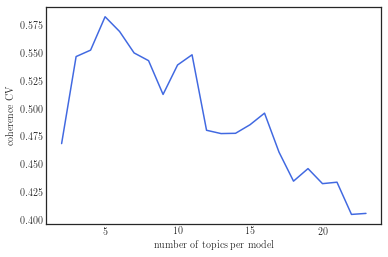

{2: 0.4690539314762131,
 3: 0.5468460514480534,
 4: 0.5526113536440561,
 5: 0.5824545082764876,
 6: 0.5692702678605766,
 7: 0.5501128906091882,
 8: 0.5431852478298269,
 9: 0.5130154523848035,
 10: 0.5393269170443495,
 11: 0.5484479830539448,
 12: 0.480962016764308,
 13: 0.4780048552784937,
 14: 0.47825126833567716,
 15: 0.48590962260226156,
 16: 0.49626234090165977,
 17: 0.4614026858113094,
 18: 0.43547935433019713,
 19: 0.44668451477843607,
 20: 0.433245423243594,
 21: 0.43453370400287417,
 22: 0.40573084124334213,
 23: 0.4066407338427385}

In [24]:
coherence_vals_cv = dicts['coherence_values_cv']
x = coherence_vals_cv.keys()
y = coherence_vals_cv.values()

'''
cumass = pd.DataFrame(data = list(x), columns = ['number of topics'])
cumass['cumass'] = y
ax = sns.barplot(x="number of topics", y="cumass", data=cumass, color="salmon")
ax.set_ylim([0.35,0.6])
ax.set_xticklabels(cumass['number of topics'], rotation=40)
for index, row in cumass.iterrows():
    ax.text(index, row.cumass, '%.2f' % row.cumass, color='black', ha="center",fontsize=7)
'''
fig = plt.figure()
plt.plot(x,y,color='royalblue')
plt.xlabel('number of topics per model')
plt.ylabel('coherence CV')

plt.show()

# save as PDF
fig.savefig("models/coherence_cv.pdf", bbox_inches='tight')

coherence_vals_cv

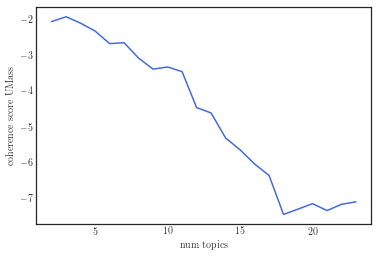

{2: -2.076872282962595,
 3: -1.9424748444609783,
 4: -2.1230288525781056,
 5: -2.3437166498919426,
 6: -2.693608227764356,
 7: -2.670608100348573,
 8: -3.1006511286056186,
 9: -3.4081796301036285,
 10: -3.3488939494898675,
 11: -3.479338468887184,
 12: -4.484366225704055,
 13: -4.635792739170705,
 14: -5.333708750619728,
 15: -5.667415858650385,
 16: -6.0619241546278015,
 17: -6.383956713648437,
 18: -7.475073861454015,
 19: -7.327314632619924,
 20: -7.173310002350222,
 21: -7.3674070846426805,
 22: -7.191717495208237,
 23: -7.1227904304972025}

In [17]:
coherence_vals_umass = dicts['coherence_values_u_mass']
x=coherence_vals_umass.keys()
y=coherence_vals_umass.values()
'''
cumass = pd.DataFrame(data = list(x), columns = ['number of topics'])
cumass['cumass'] = y
ax = sns.barplot(x="number of topics", y="cumass", data=cumass, color="salmon")
ax.set_xticklabels(cumass['number of topics'], rotation=40)
for index, row in cumass.iterrows():
    ax.text(index, row.cumass, '%.2f' % row.cumass, color='black', ha="center",fontsize=7)
'''
plt.plot(x,y,color='royalblue')
plt.xlabel('number of topics')
plt.ylabel('coherence score UMass')

plt.show()
coherence_vals_umass

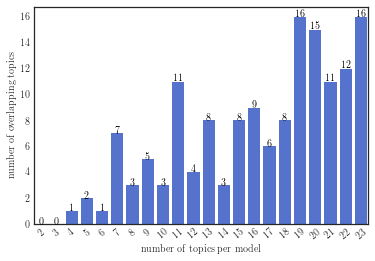

In [23]:
# number of overlaps in each model with different number of topics (manually counted)
fig = plt.figure()
overlaps = [0,0,1,2,1,7,3,5,3,11,4,8,3,8,9,6,8,16,15,11,12,16]
o = pd.DataFrame(data = list(x), columns = ['topics'])
o['overlaps'] = overlaps
ax = sns.barplot(x="topics", y="overlaps", data=o, color="royalblue")
ax.set_xticklabels(o['topics'], rotation=40)
for index, row in o.iterrows():
    ax.text(index, row.overlaps, row.overlaps, color='black', ha="center")
#plt.title("number of overlapping topics per model", fontsize=15)
plt.xlabel('number of topics per model')
plt.ylabel('number of overlapping topics')
plt.show()

# save as PDF
fig.savefig("models/overlapping_topics.pdf", bbox_inches='tight')

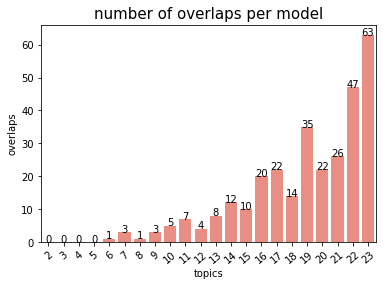

In [71]:
# number of overlaps in each model with different number of topics (manually counted)
overlaps = [0,0,0,0,1,3,1,3,5,7,4,8,12,10,20,22,14,35,22,26,47,63]
o = pd.DataFrame(data = list(x), columns = ['topics'])
o['overlaps'] = overlaps
ax = sns.barplot(x="topics", y="overlaps", data=o, color="salmon")
ax.set_xticklabels(o['topics'], rotation=40)
for index, row in o.iterrows():
    ax.text(index, row.overlaps, row.overlaps, color='black', ha="center")
plt.title("number of overlaps per model", fontsize=15)
plt.show()